<a href="https://colab.research.google.com/github/SaanviGoel30/Options-Pricing-Model/blob/main/Binomial_Pricing_Model_AmericanOptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BINOMIAL PRICING MODEL - AMERICAN OPTIONS**

In [ ]:
#installing library
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = 'SPY'
end = date.today()
start = end.replace(year = 2023)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(start=start, end=end)


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-16 00:00:00-05:00,603.967249,605.741308,603.179921,604.754578,43695200,0.000,0.0,0.0
2024-12-17 00:00:00-05:00,602.163299,603.139992,600.867672,602.262939,55773500,0.000,0.0,0.0
2024-12-18 00:00:00-05:00,601.953994,604.375836,583.924709,584.313416,108248700,0.000,0.0,0.0
2024-12-19 00:00:00-05:00,589.376338,591.010851,583.884811,584.133972,85919500,0.000,0.0,0.0
2024-12-20 00:00:00-05:00,581.770020,595.750000,580.909973,591.150024,125535900,1.966,0.0,0.0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-12-22 00:00:00-05:00,467.858608,469.359376,465.725990,467.651276,67126600,0.0,0.0,0.0
2023-12-26 00:00:00-05:00,468.065970,470.544160,467.986966,469.625946,55387000,0.0,0.0,0.0
2023-12-27 00:00:00-05:00,469.418642,470.623192,468.875619,470.475098,68000300,0.0,0.0,0.0
2023-12-28 00:00:00-05:00,470.840398,471.501895,470.228255,470.652802,77158100,0.0,0.0,0.0
2023-12-29 00:00:00-05:00,470.455331,470.988501,467.305730,469.290283,122234100,0.0,0.0,0.0


In [ ]:
symbol = 'SPY'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2024-12-23',
 '2024-12-24',
 '2024-12-26',
 '2024-12-27',
 '2024-12-31',
 '2025-01-03',
 '2025-01-10',
 '2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY241224C00570000,2024-12-20 16:25:07+00:00,570.0,22.59,21.14,21.33,6.09,36.909092,34,8,0.226082,True,REGULAR,USD
1,SPY241224C00580000,2024-12-20 20:58:02+00:00,580.0,10.86,11.59,11.71,2.83,35.242840,567,214,0.178719,True,REGULAR,USD
2,SPY241224C00588000,2024-12-20 21:14:32+00:00,588.0,4.83,4.95,5.02,1.93,66.551710,3752,1116,0.150155,True,REGULAR,USD
3,SPY241224C00590000,2024-12-20 21:14:58+00:00,590.0,3.60,3.58,3.62,1.47,69.014070,8404,1853,0.140878,True,REGULAR,USD
4,SPY241224C00592000,2024-12-20 21:14:03+00:00,592.0,2.36,2.41,2.44,0.85,56.291380,9189,759,0.132943,False,REGULAR,USD


# **Calculation of u and d**

u =size of the up move factor=
 e^{σ\sqrt{t}}, and

d =size of the down move factor=
 = e^{−σ\sqrt{t}}
 = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.



In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close'] / df['Close'].shift(1))
    log_return = log_return.dropna()  #to remove nan
    daily_vol = log_return.std()
    vol = daily_vol * np.sqrt(252)

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.12470555917260473

In [ ]:
dfo.options[1]

'2024-12-24'

In [ ]:
date.today()

datetime.date(2024, 12, 22)

In [ ]:
expiration_date = pd.to_datetime(dfo.options[1]).date()
today = date.today()
days_left = (expiration_date - today).days
N = 100          #Number of steps
T = days_left/365      #Calculate the number of days left for expiry from your calculation in years, change accordingly
t = T/N


In [ ]:
u = np.exp(vol*np.sqrt(t))     #Calculate u from the above formula
u

1.0009235381629402

In [ ]:
d = 1/u  #Similarly calculate d
d

0.9990773139728183

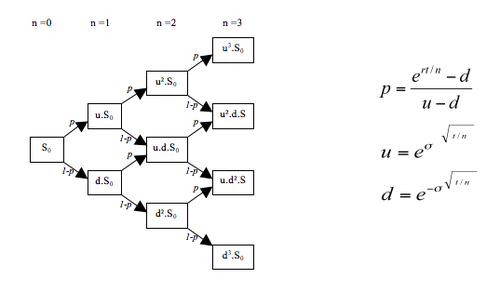

In [ ]:
def first_binomial_american(S, K, T, r, u, d, N, option_type):
    """
    Implementation of binomial pricing model for American options.

    Parameters
    ----------
    S : float
        Stock price
    K : float
        Strike price
    T : float
        Expiry time in years
    r : float
        Risk-free rate (annualized, continuous compounding)
    u : float
        Size of up move factor
    d : float
        Size of down move factor
    N : int
        Number of steps in the binomial model
    option_type : char
        'C' for Call, 'P' for Put

    Returns
    -------
    price : float
        Returns the price of the option
    """
    # Calculate the risk-neutral up and down probabilities
    dt = T / N  # time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk-neutral probability
    disc = np.exp(-r * dt)  # discount factor per step

    # Initialize option value matrix with zeros
    option_values = np.zeros((N+1, N+1))
    # Terminal values at expiry (t = T)
    for i in range(N+1):
        if option_type == 'C':
            option_values[i, N] = max(S * (u ** (N-i)) * (d ** i) - K, 0)  # Call payoff
        elif option_type == 'P':
            option_values[i, N] = max(K - S * (u ** (N-i)) * (d ** i), 0)  # Put payoff
        else:
            raise ValueError("Invalid option type. Use 'C' for Call or 'P' for Put.")
    # Backward induction for American options
    for j in range(N-1, -1, -1):  # Move backward from step N-1 to 0
        for i in range(j+1):
            # Option value at this node if held until next step (not exercised)
            hold_value = disc * (p * option_values[i, j+1] + (1 - p) * option_values[i+1, j+1])

            # Option value at this node if exercised immediately
            if option_type == 'C':
                exercise_value = max(S * (u ** (j-i)) * (d ** i) - K, 0)
            elif option_type == 'P':
                exercise_value = max(K - S * (u ** (j-i)) * (d ** i), 0)
            # For American options, the value is the maximum of holding or exercising
            option_values[i, j] = max(hold_value, exercise_value)
    # The option price is at the root of the tree (i.e., at [0,0])
    return option_values[0, 0]


In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated by n step binomial model
call = {}
for K in dfo_exp.calls['strike']:
    call[K] = first_binomial_american(
        S=df['Close'].iloc[-1],
        K=K,
        T=T,
        r=0.01 * t,
        u=u,
        d=d,
        N=N,
        option_type='C'
    )

th_call = pd.DataFrame.from_dict(call, orient='index', columns=['th_call'])
th_call.head()

,th_call
570.0,21.150065
580.0,11.188243
588.0,4.098558
590.0,2.794898
592.0,1.781974


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
570.0,22.59
580.0,10.86
588.0,4.83
590.0,3.60
592.0,2.36


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
570.0,21.150065,22.59
580.0,11.188243,10.86
588.0,4.098558,4.83
590.0,2.794898,3.60
592.0,1.781974,2.36
593.0,1.382662,1.80
594.0,1.050917,1.47
595.0,0.781527,1.09
596.0,0.567948,0.77
597.0,0.402818,0.55


<Axes: >

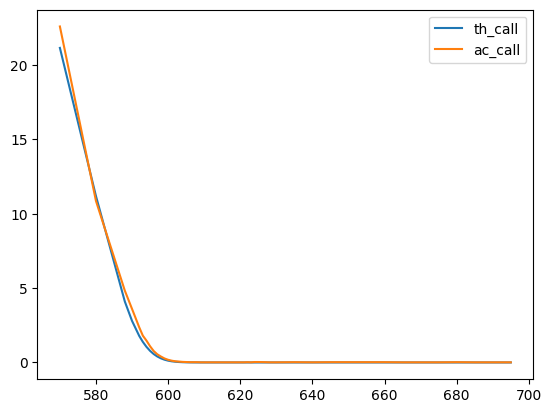

In [ ]:
call.plot() #plotting the actual and theoretical option prices

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#put price calculated by n step binomial model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = first_binomial_american(
        S=df['Close'][len(df)-1],
        K=K,
        T=T,
        r=0.01 * t,
        u=u,
        d=d,
        N=N,
        option_type='P'
    )
    put[K] = put_price

th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns={0: "th_put"}, inplace=True)
th_put.head()

,th_put
520.0,0.000000e+00
525.0,0.000000e+00
530.0,0.000000e+00
535.0,0.000000e+00
540.0,8.069364e-31


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
520.0,0.03
525.0,0.02
530.0,0.03
535.0,0.03
540.0,0.04


In [ ]:
put = th_put
put["ac_put"] = ac_put
put.head(10)

,th_put,ac_put
520.0,0.000000e+00,0.03
525.0,0.000000e+00,0.02
530.0,0.000000e+00,0.03
535.0,0.000000e+00,0.03
540.0,8.069364e-31,0.04
545.0,6.735423e-23,0.05
550.0,1.675700e-17,0.06
560.0,5.873065e-10,0.09
570.0,3.900812e-05,0.17
580.0,3.821708e-02,0.61


<Axes: >

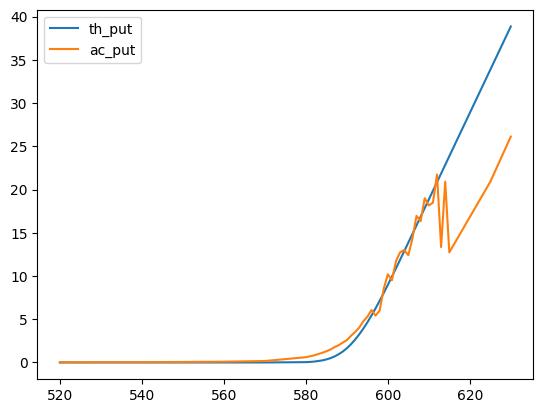

In [ ]:
put.plot() #plotting the actual and theoretical option prices